In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("../archive/Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

<AxesSubplot: xlabel='Life expectancy ', ylabel='Density'>

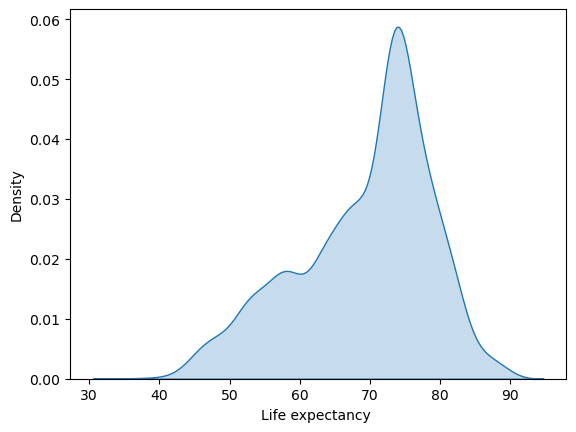

In [4]:
sns.kdeplot(df['Life expectancy '], fill=True)

In [5]:
df['Life expectancy '].skew()

-0.6386047358773552

In [6]:
# One hot encoding for categorical datas
columns = ['Country', 'Status']
df = pd.get_dummies(df, columns)
df.head()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,False,False,False,False,False,False,False,False,False,True
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,False,False,False,False,False,False,False,False,False,True
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,False,False,False,False,False,False,False,False,False,True
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,False,False,False,False,False,False,False,False,False,True
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,False,False,False,False,False,False,False,False,False,True


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Life expectancy ', axis=1), df['Life expectancy '], test_size=0.2, random_state=3)

In [8]:
print("X_train :", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train : (2350, 214)
X_test:  (588, 214)
y_train:  (2350,)
y_test:  (588,)


In [9]:
X_train

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
1145,2008,159.0,4,3.14,231.911292,92.0,0,45.1,5,93.0,...,False,False,False,False,False,False,False,False,False,True
1875,2001,193.0,4,3.51,22.355954,87.0,0,43.5,5,89.0,...,False,False,False,False,False,False,False,False,False,True
245,2010,81.0,0,10.22,665.735612,97.0,40,61.9,1,98.0,...,False,False,False,False,False,False,False,False,True,False
222,2001,125.0,0,7.38,138.166463,18.0,0,43.8,0,93.0,...,False,False,False,False,False,False,False,False,False,True
374,2009,88.0,0,0.25,1873.686852,96.0,2,35.2,0,99.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,2008,441.0,29,3.91,5.379606,77.0,44,2.7,44,75.0,...,False,False,False,False,False,False,False,False,False,True
968,2009,286.0,3,2.99,0.000000,97.0,0,23.5,6,97.0,...,False,False,False,False,False,False,False,False,False,True
1667,2015,146.0,0,NaN,0.000000,97.0,0,33.3,0,98.0,...,False,False,False,False,False,False,False,False,False,True
1688,2010,127.0,35,5.21,1033.039737,93.0,0,6.1,40,95.0,...,False,False,False,False,False,False,False,False,False,True


In [10]:
X_train.drop('Year', axis=1, inplace=True)

In [11]:
X_train

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
1145,159.0,4,3.14,231.911292,92.0,0,45.1,5,93.0,8.40,...,False,False,False,False,False,False,False,False,False,True
1875,193.0,4,3.51,22.355954,87.0,0,43.5,5,89.0,5.26,...,False,False,False,False,False,False,False,False,False,True
245,81.0,0,10.22,665.735612,97.0,40,61.9,1,98.0,1.17,...,False,False,False,False,False,False,False,False,True,False
222,125.0,0,7.38,138.166463,18.0,0,43.8,0,93.0,5.47,...,False,False,False,False,False,False,False,False,False,True
374,88.0,0,0.25,1873.686852,96.0,2,35.2,0,99.0,2.85,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2304,441.0,29,3.91,5.379606,77.0,44,2.7,44,75.0,1.29,...,False,False,False,False,False,False,False,False,False,True
968,286.0,3,2.99,0.000000,97.0,0,23.5,6,97.0,5.85,...,False,False,False,False,False,False,False,False,False,True
1667,146.0,0,NaN,0.000000,97.0,0,33.3,0,98.0,NaN,...,False,False,False,False,False,False,False,False,False,True
1688,127.0,35,5.21,1033.039737,93.0,0,6.1,40,95.0,6.39,...,False,False,False,False,False,False,False,False,False,True


# Train a base line Model

In [12]:
# X_train.drop('Year', axis=1, inplace=True)
X_test.drop('Year', axis=1, inplace=True)

In [13]:
X_test

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
317,234.0,14,2.26,0.000000,77.0,0,44.0,18,76.0,6.53,...,False,False,False,False,False,False,False,False,False,True
1797,242.0,2,0.01,751.398272,88.0,477,34.9,3,88.0,8.93,...,False,False,False,False,False,False,False,False,False,True
1647,75.0,0,5.73,1552.740429,NaN,7,63.4,0,95.0,7.86,...,False,False,False,False,False,False,False,False,True,False
1928,12.0,1,0.46,1154.893473,98.0,0,52.8,1,99.0,2.76,...,False,False,False,False,False,False,False,False,False,True
1547,85.0,0,11.98,15345.490700,95.0,8,57.5,0,99.0,7.75,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2408,397.0,51,7.30,45.963808,73.0,1459,4.1,73,71.0,8.70,...,False,False,False,False,False,False,False,False,False,True
2626,345.0,15,1.37,6.226049,NaN,26,19.3,22,85.0,5.56,...,False,False,False,False,False,False,False,False,False,True
2199,186.0,0,4.80,0.000000,NaN,0,4.1,0,99.0,3.73,...,False,False,False,False,False,False,False,False,False,True
2782,348.0,88,4.04,0.000000,9.0,1622,21.3,128,88.0,5.72,...,False,False,False,False,False,False,False,False,False,True


In [14]:
# Fill the nan value
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)

In [15]:
y_train.isna().sum()

7

In [16]:
y_test.isna().sum()

3

In [17]:
y_train.fillna(y_train.mean(), inplace=True)

In [18]:
y_test.fillna(y_test.mean(), inplace=True)

# Train Model

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [20]:
# Scale model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.05089185, -0.2293179 , -0.37514898, ..., -0.07741544,
        -0.46107516,  0.46107516],
       [ 0.22463804, -0.2293179 , -0.28033372, ..., -0.07741544,
        -0.46107516,  0.46107516],
       [-0.68298986, -0.26390804,  1.43915384, ..., -0.07741544,
         2.16884382, -2.16884382],
       ...,
       [-0.15624152, -0.26390804,  0.        , ..., -0.07741544,
        -0.46107516,  0.46107516],
       [-0.31021411,  0.03875567,  0.15530397, ..., -0.07741544,
        -0.46107516,  0.46107516],
       [ 1.69142956,  4.24145757,  1.100894  , ..., -0.07741544,
        -0.46107516,  0.46107516]])

In [26]:
# Train with linear model
lr = LinearRegression(n_jobs=-1)
lr.fit(X_train_scaled, y_train)
# Get predicted Value
lr_predicted = lr.predict(X_test_scaled)

array([ 6.87607978e+01,  6.66406806e+01,  8.01260321e+01,  7.62734931e+01,
        8.12744696e+01,  7.42022040e+01,  5.75820868e+01,  7.08936103e+01,
        8.11377509e+01,  6.31650946e+01,  7.52363837e+01,  7.45440009e+01,
       -3.94407633e+12,  6.10830634e+01,  7.51982978e+01,  8.18213446e+01,
        7.37236884e+01,  5.24111884e+01,  5.57012274e+01,  7.04658759e+01,
        8.19424384e+01,  7.28555243e+01,  7.60420478e+01,  6.01553290e+01,
        5.76318915e+01,  6.94248603e+01,  7.27852118e+01, -1.92585830e+13,
        6.75459540e+01,  6.92041571e+01,  7.22881415e+01,  7.11846259e+01,
        8.17275946e+01,  6.22666571e+01,  6.62842353e+01,  6.17119696e+01,
        7.42393134e+01,  6.92373603e+01,  5.73057196e+01,  5.60322821e+01,
        7.21357978e+01,  7.30000556e+01,  5.34648993e+01,  8.05322821e+01,
        6.10752509e+01,  7.28584540e+01,  4.81553290e+01,  7.33330634e+01,
        7.31611884e+01,  7.54072821e+01,  7.90654853e+01,  7.47764228e+01,
        5.63740790e+01,  

In [27]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print(mean_squared_error(y_test, lr_predicted))
print(mean_absolute_error(y_test, lr_predicted))
print(r2_score(y_test, lr_predicted))

1.5218036100016154e+24
77805714922.65846
-1.7110431655218393e+22
